Data Analysis on Netflix Dataset, on the lenght of duration of the movie vs the release year

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
netflix_df = pd.read_csv("netflix_data.csv")

# Print the first five rows of the DataFrame
netflix_df.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [20]:
netflix_df_movies_only = netflix_df[netflix_df['type']=='Movie']
netflix_movies_col_subset = netflix_df_movies_only[['title','country','genre','release_year','duration']]
print(netflix_movies_col_subset.head(5))

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


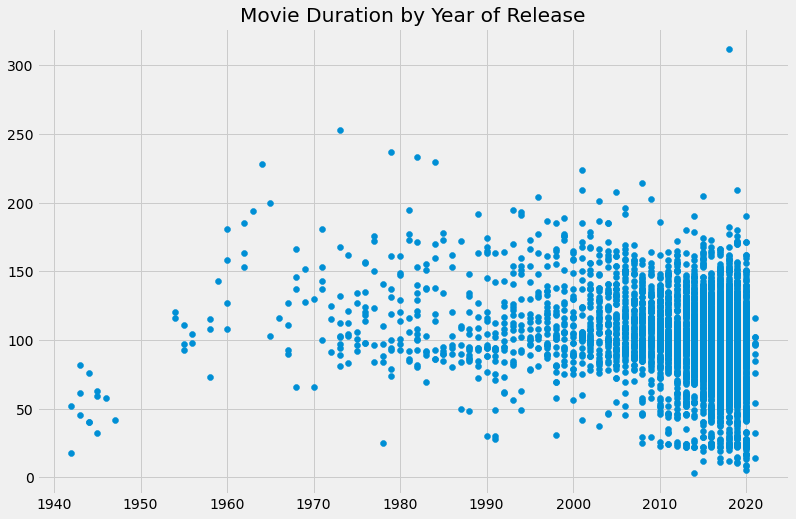

In [21]:
fig = plt.figure(figsize=(12,8))
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'])
plt.title('Movie Duration by Year of Release')
plt.show()

Upon further inspection, something else is going on. Some of these films are under an hour long! Let's filter our DataFrame for movies with a duration under 60 minutes and look at the genres. This might give us some insight into what is dragging down the average.

In [22]:
short_movies = netflix_movies_col_subset[netflix_movies_col_subset['duration'].astype('float')<60]
short_movies.head(20)

,title,country,genre,release_year,duration
35,#Rucker50,United States,Documentaries,2016,56
55,100 Things to do Before High School,United States,Uncategorized,2014,44
67,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,Uncategorized,2017,37
101,3 Seconds Divorce,Canada,Documentaries,2018,53
146,A 3 Minute Hug,Mexico,Documentaries,2019,28
162,A Christmas Special: Miraculous: Tales of Lady...,France,Uncategorized,2016,22
171,A Family Reunion Christmas,United States,Uncategorized,2019,29
177,A Go! Go! Cory Carson Christmas,United States,Children,2020,22
178,A Go! Go! Cory Carson Halloween,NaN,Children,2020,22
179,A Go! Go! Cory Carson Summer Camp,NaN,Children,2020,21


 It looks as though many of the films that are under 60 minutes fall into genres such as "Children", "Stand-Up", and "Documentaries". This is a logical result, as these types of films are probably often shorter than 90 minute Hollywood blockbuster.


In [23]:
colors = []
for lab,row in netflix_movies_col_subset.iterrows():
  if row['genre']=='Children':
    colors.append('red')
  elif row['genre']=='Documentaries':
    colors.append('blue')
  elif row['genre']=='Stand-Up':
    colors.append('green')
  else:
    colors.append('black')
print(colors[:10])

['black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'black', 'blue']


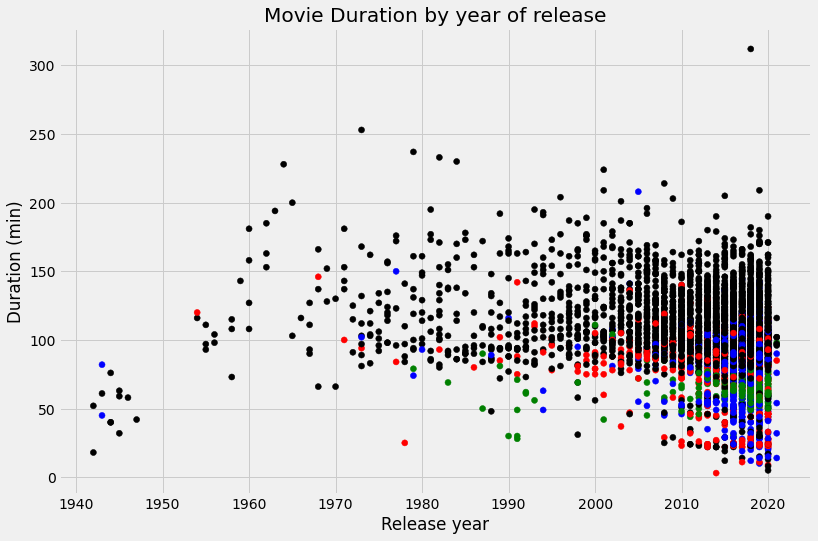

In [24]:
# Set the figure style and initalize a new figure
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,8))

# Create a scatter plot of duration versus release_year
plt.scatter(netflix_movies_col_subset['release_year'],netflix_movies_col_subset['duration'],c=colors)

# Create a title and axis labels
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by year of release')

# Show the plot
plt.show()